In [2]:
## Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:

# Load the dataset
data = pd.read_csv(r'Data.csv')

# Drop index column if present
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()

# Define features and target
X = data[['Chloride', 'Organic_Carbon', 'Solids', 'Sulphate', 'Turbidity', 'ph']]
y = data['Label']

# Check class distribution
print("\nClass Distribution:\n", y.value_counts(normalize=True))

Missing Values:
 Chloride          0
Label             0
Organic_Carbon    0
Solids            0
Sulphate          0
Turbidity         0
ph                0
dtype: int64

Class Distribution:
 Label
0    0.651
1    0.349
Name: proportion, dtype: float64


In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("\nScaler saved as 'scaler.pkl'")

# Define models, including SVM and KNN
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True),  # probability=True for consistency
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)  # Default n_neighbors=5
}


Scaler saved as 'scaler.pkl'


In [5]:
# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = recall  # Same as recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Confusion Matrix': cm,
        'Model': model
    }
    
    print(f"{name} trained successfully.")

Logistic Regression trained successfully.
Random Forest trained successfully.
SVM trained successfully.
K-Nearest Neighbors trained successfully.


In [10]:
# Print model performance metrics
print("\nModel Performance Metrics:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}")
    print(f"Sensitivity: {metrics['Sensitivity']:.4f}")
    print(f"Specificity: {metrics['Specificity']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")


Model Performance Metrics:

Logistic Regression:
Precision: 0.7377
Recall: 0.8782
Accuracy: 0.8485
F1-Score: 0.8018
Sensitivity: 0.8782
Specificity: 0.8326
Confusion Matrix:
[[1084  218]
 [  85  613]]

Random Forest:
Precision: 0.6656
Recall: 0.6218
Accuracy: 0.7590
F1-Score: 0.6430
Sensitivity: 0.6218
Specificity: 0.8326
Confusion Matrix:
[[1084  218]
 [ 264  434]]

SVM:
Precision: 0.7377
Recall: 0.8782
Accuracy: 0.8485
F1-Score: 0.8018
Sensitivity: 0.8782
Specificity: 0.8326
Confusion Matrix:
[[1084  218]
 [  85  613]]

K-Nearest Neighbors:
Precision: 0.7139
Recall: 0.7865
Accuracy: 0.8155
F1-Score: 0.7485
Sensitivity: 0.7865
Specificity: 0.8310
Confusion Matrix:
[[1082  220]
 [ 149  549]]


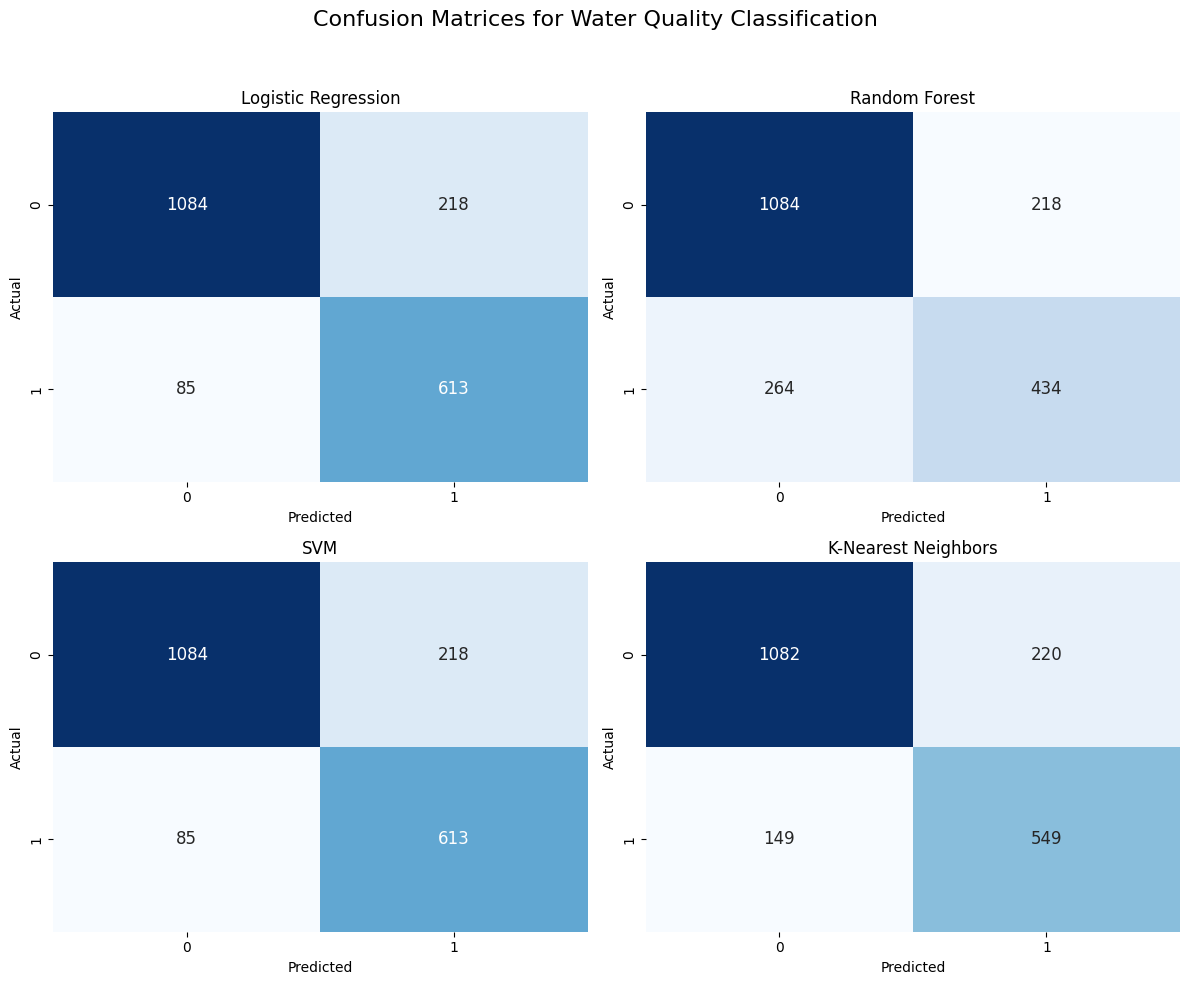

In [6]:
# Visualize confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjusted for 4 models
fig.suptitle('Confusion Matrices for Water Quality Classification', fontsize=16)
axes = axes.ravel()  # Flatten axes for easier iteration
for idx, (name, metrics) in enumerate(results.items()):
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                cbar=False, annot_kws={'size': 12})
    axes[idx].set_title(name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('confusion_matrices.png')
plt.show()

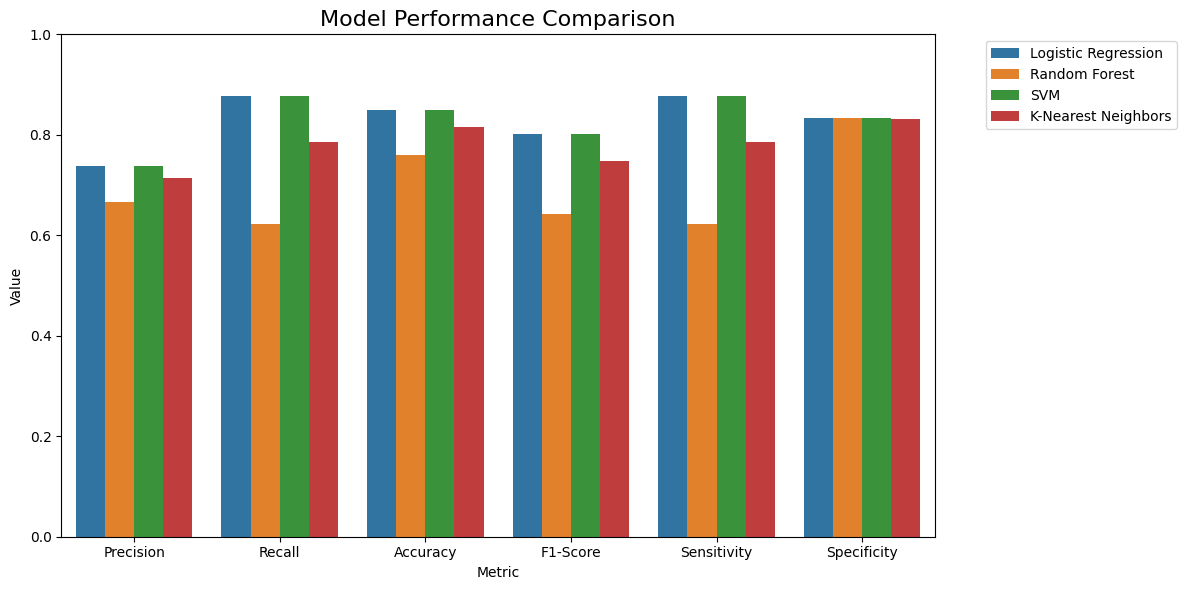

In [7]:
# Visualize model comparison
metrics_df = pd.DataFrame({
    'Model': [name for name in results.keys() for _ in range(6)],
    'Metric': ['Precision', 'Recall', 'Accuracy', 'F1-Score', 'Sensitivity', 'Specificity'] * len(results),
    'Value': [results[name][metric] for name in results for metric in ['Precision', 'Recall', 'Accuracy', 'F1-Score', 'Sensitivity', 'Specificity']]
})

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_df)
plt.title('Model Performance Comparison', fontsize=16)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

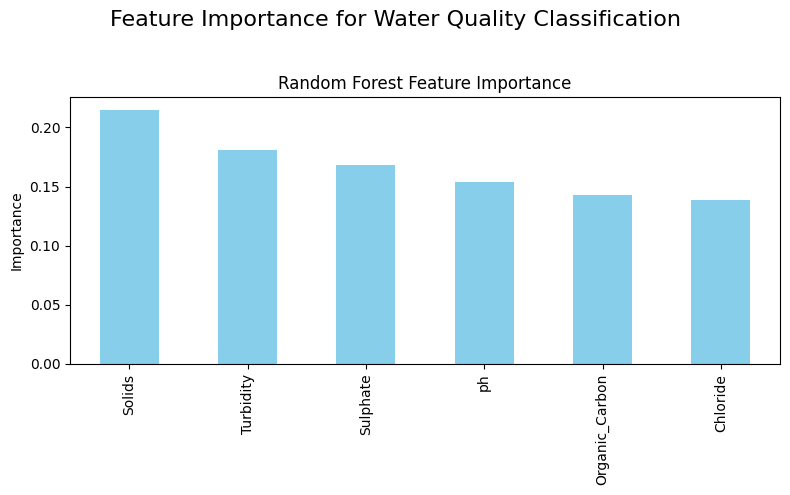

In [8]:
# Feature importance for Random Forest
plt.figure(figsize=(8, 5))
plt.suptitle('Feature Importance for Water Quality Classification', fontsize=16)
rf_model = results['Random Forest']['Model']
rf_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
rf_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Random Forest Feature Importance')
plt.ylabel('Importance')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('feature_importance.png')
plt.show()


In [9]:
# Find the best model based on F1-score
best_model_name = max(results, key=lambda x: results[x]['F1-Score'])
best_model = results[best_model_name]['Model']
joblib.dump(best_model, 'best_water_quality_model.pkl')
print(f"Best model ({best_model_name}) saved as 'best_water_quality_model.pkl'")

Best model (Logistic Regression) saved as 'best_water_quality_model.pkl'
